# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Dataset

In [2]:
df = pd.read_csv('Zoo.csv')

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.shape

(101, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# EDA

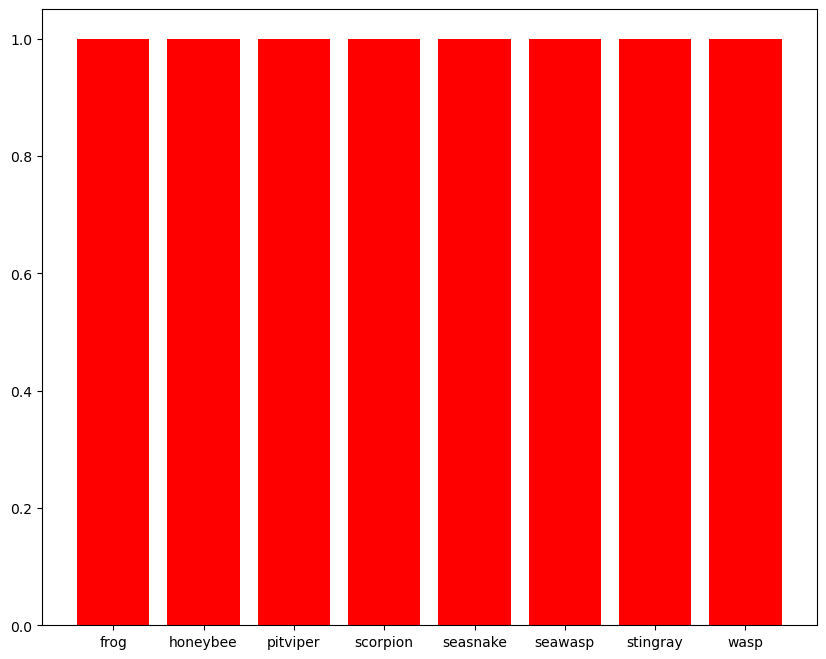

In [6]:
venomous_animals = df[df['venomous'] == 1]

plt.figure(figsize=(10, 8))
plt.bar(venomous_animals['animal name'], 1, color='red')
plt.show()

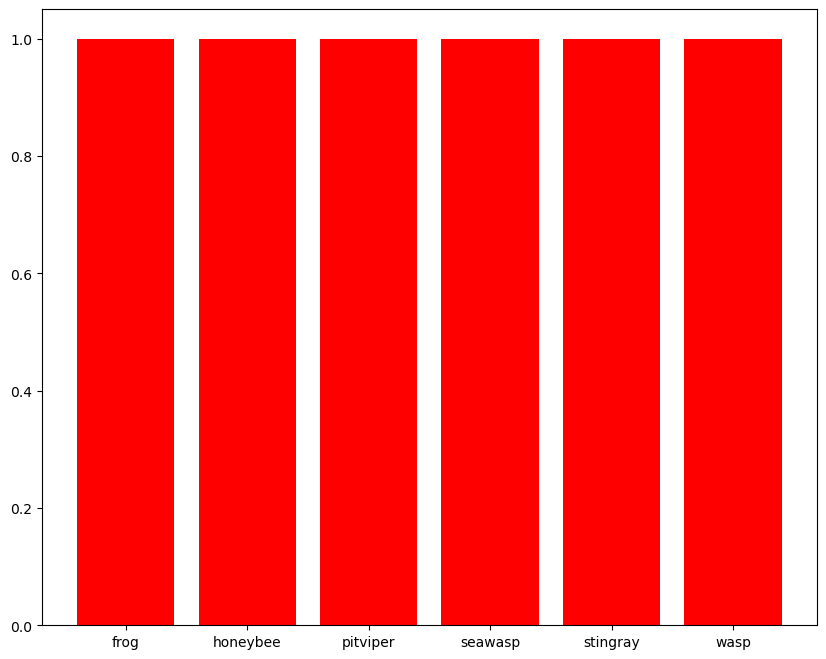

In [7]:
venomous_lays_eggs = df[(df['venomous'] == 1) & (df['eggs'] == 1)]

plt.figure(figsize=(10, 8))
plt.bar(venomous_lays_eggs['animal name'], 1, color='red')
plt.show()

In [8]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [9]:
len(df['animal name'])

101

In [10]:
df[df['animal name'].duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
df[df['animal name'] == 'frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [12]:
# Here both frogs have same feature except for venomenous and both belongs to same type so we drop 1

In [13]:
df.drop(26, inplace=True)

In [14]:
# Here animal name is not important for model so we drop that

In [15]:
df.drop('animal name', axis=1 ,inplace=True)

In [16]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<AxesSubplot:>

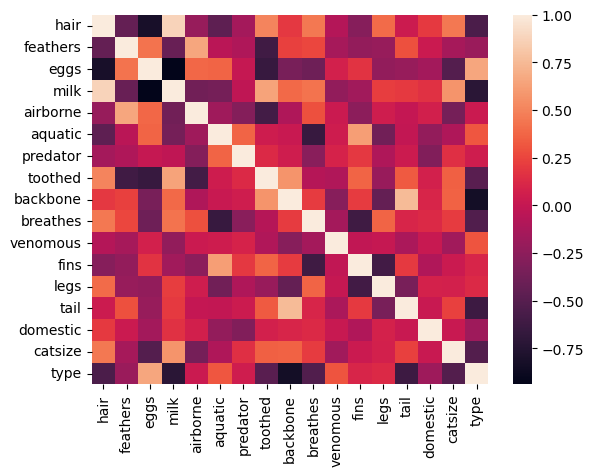

In [17]:
sns.heatmap(df.corr())

In [18]:
correlation_matrix = df.corr()

# Filter features with correlation score > 0.75
highly_correlated_features = correlation_matrix[correlation_matrix > 0.75]
highly_correlated_features = highly_correlated_features.stack().reset_index()
highly_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter out duplicate entries and correlation score of 1 (correlation of a feature with itself)
highly_correlated_features = highly_correlated_features[(highly_correlated_features['Feature 1'] != highly_correlated_features['Feature 2'])]

In [19]:
highly_correlated_features

,Feature 1,Feature 2,Correlation
1,hair,milk,0.877637
4,milk,hair,0.877637
11,backbone,tail,0.751391
16,tail,backbone,0.751391


In [20]:
# From this we drop hair and backbone

In [21]:
df.drop(['hair', 'backbone'], axis=1, inplace=True)

In [22]:
df

,feathers,eggs,milk,airborne,aquatic,predator,toothed,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,0,1,0,0,1,1,1,0,0,4,0,0,1,1
1,0,0,1,0,0,0,1,1,0,0,4,1,0,1,1
2,0,1,0,0,1,1,1,0,0,1,0,1,0,0,4
3,0,0,1,0,0,1,1,1,0,0,4,0,0,1,1
4,0,0,1,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,0,0,0,1,1,0,0,2,1,0,1,1
97,0,1,0,1,0,0,0,1,1,0,6,0,0,0,6
98,0,0,1,0,0,1,1,1,0,0,4,1,0,1,1
99,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7


# Spltting data for training and testing

In [23]:
X = df.drop('type', axis=1)

In [24]:
y = df['type']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [27]:
y_test[y_test == 7]

Series([], Name: type, dtype: int64)

# Creatting the model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model = KNeighborsClassifier()

In [30]:
model.fit(X_train, y_train)

KNeighborsClassifier()

# Model Evaluation

In [31]:
from sklearn.metrics import classification_report

In [34]:
y_pred = model.predict(X_test)

C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
report = classification_report(y_test, y_pred)

C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [36]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.64      0.63      0.64        20
weighted avg       0.91      0.85      0.87        20



# Selecting best k value

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
n_neighbours = np.array(range(1,40))

In [39]:
dict(n_neighbors = n_neighbours)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [40]:
model =  KNeighborsClassifier()

In [41]:
grid = GridSearchCV(estimator=model,param_grid=dict(n_neighbors = n_neighbours),cv=12,n_jobs=-1)

In [42]:
grid.fit(X_train,y_train)

C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=12.
  warnings.warn(


GridSearchCV(cv=12, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [43]:
grid.best_score_

0.9603174603174605

In [44]:
grid.best_params_

{'n_neighbors': 1}

In [45]:
# Here we get best score for k = 1